In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR

In [4]:
#Loading the Dataset (reading the dataset using_csv)
df = pd.read_csv("stock_data.csv",parse_dates=True,index_col="Date")

#displaying the first five rows of Dataset
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [7]:
#Dropping Unwanted Columns

#deleting column
df.drop(columns='Unnamed: 0')

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


<AxesSubplot:xlabel='Date'>

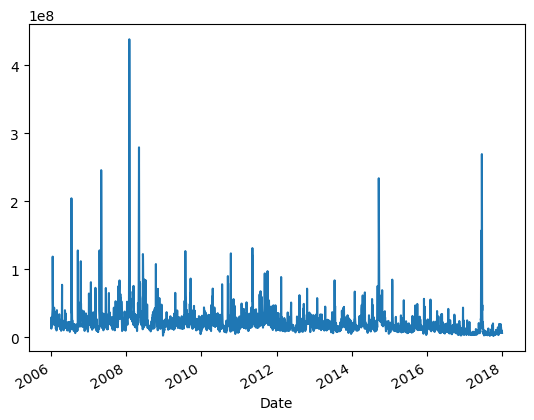

In [8]:
#plotting a simple line lot for time series data
df['Volume'].plot()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

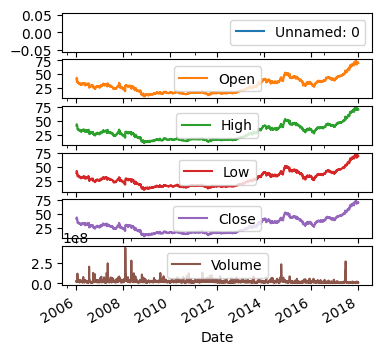

In [9]:
#Plot other columns
df.plot(subplots=True,figsize=(4,4))

In [10]:
# Resampling: Resampling is a methodology of economically using a data sample␣
#↪to improve the accuracy and
#quantify the uncertainty of a population parameter.
#Resampling for months or weeks and making bar plots is another very simple and␣
#↪widely used method of finding seasonality.
#Here we are going to make a bar plot of month data for 2016 and 2017.

<ipython-input-13-077e1ecae39a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df.resample("M").mean()


<BarContainer object of 24 artists>

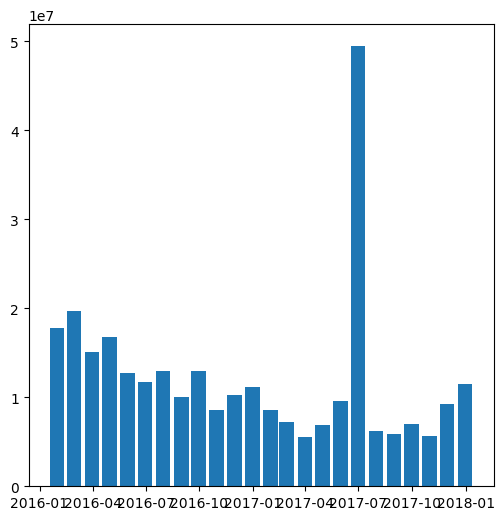

In [13]:
#Resampling the time series data based on monthly 'M' frequency
df_month = df.resample("M").mean()

#using subplot
fig,ax=plt.subplots(figsize=(6,6))

#plotting bar graph
ax.bar(df_month['2016':].index,
      df_month.loc['2016':, "Volume"],
      width=25,align='center')

In [14]:
#Differencing: Differencing is used to make the difference in values of a␣
#↪specified interval.
#By default, it’s one, we can specify different values for plots. It is the␣
#↪most popular method to remove
#trends in the data

<AxesSubplot:xlabel='Date'>

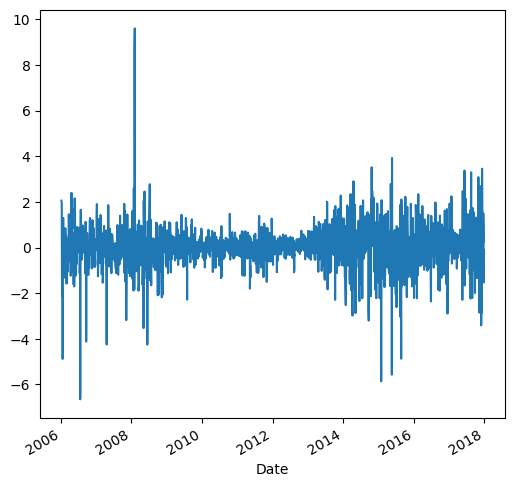

In [15]:
df.Low.diff(2).plot(figsize=(6,6))

<AxesSubplot:xlabel='Date'>

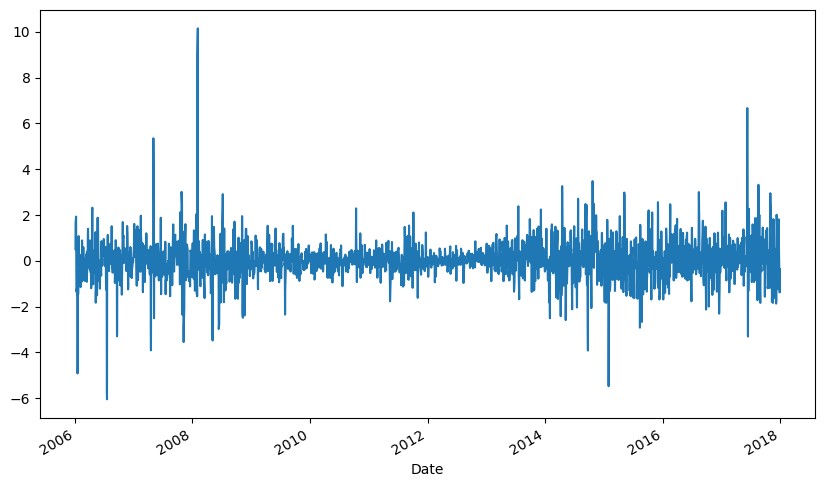

In [18]:
df.High.diff(2).plot(figsize=(10,6))

In [19]:
#Trend In The Dataset
#We can see the change in trend in our dataset, Trend helps us see where the␣
#↪value of data that
#we are considering is going upward or downward in the long run.

<AxesSubplot:xlabel='Date'>

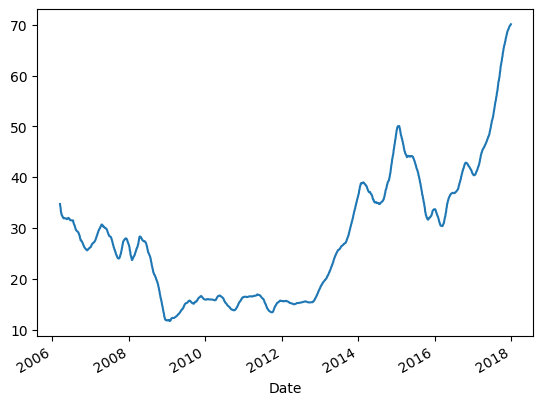

In [20]:
#Finding the trend in the "Open"
#column using moving average method

window_size =50
rolling_mean = df['Open'].rolling\
(window_size).mean()
rolling_mean.plot()